In [1]:
import numpy as np
import csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score

In [2]:
with open('train.csv') as csv_file: # Make sure to replace 'train.csv' with your actual file path
    readCSV = csv.reader(csv_file)
    next(readCSV, None) # Skip the title of the csv file
    data1 = []
    for row in readCSV:
        data1.append(row)
print(len(data1))

6500


In [4]:
# with open('train.csv') as csv_file: #/Users/thanakornpongritsakda/Documents/Programming-SCMA-249/50_Startups.csv (path)
#     readCSV = csv.reader(csv_file)
#     next(readCSV, None) #skip the title of the csv file
#     data1 = []
#     for row in readCSV:
#         data1.append(row)
        
with open('train.csv') as csv_file: # Make sure to replace 'train.csv' with your actual file path
    readCSV = csv.reader(csv_file)
    next(readCSV, None) # Skip the title of the csv file
    data1 = []
    for row in readCSV:
        if "" not in row:  # This checks if 'NA' is not present in the row
            data1.append(row)

        
data1 = np.array(data1)
Artist_reputation = np.array(data1[:,2], dtype = np.float64)
Height = np.array(data1[:,3], dtype = np.float64)
Width = np.array(data1[:,4], dtype = np.float64)
Weight = np.array(data1[:,5], dtype = np.float64)
Material = np.array(data1[:,6])
Price_of_sculpture = np.array(data1[:,7], dtype = np.float64)
Base_shipping_price = np.array(data1[:,8], dtype = np.float64)
International = np.array(data1[:,9])
Express_shipment = np.array(data1[:,10])
Installation_included = np.array(data1[:,11])
Transport = np.array(data1[:,12])
Fragile = np.array(data1[:,13])
Customer_information = np.array(data1[:,14])
Remote_location = np.array(data1[:,15])
Scheduled_date = np.array(data1[:,16])
Delivery_date = np.array(data1[:,17])
Customer_location = np.array(data1[:,18])
Cost = np.abs(data1[:, 19].astype(np.float64))

Size = Width * Height


# Define a function to convert date strings to datetime objects
def parse_dates(date_str):
    return datetime.strptime(date_str, '%m/%d/%y')  # Adjusted the format to match your dates

# Vectorize the function so it can be applied over numpy arrays
vectorized_parse_dates = np.vectorize(parse_dates)

# Convert the date strings to datetime objects
Scheduled_dates_parsed = vectorized_parse_dates(Scheduled_date)
Delivery_dates_parsed = vectorized_parse_dates(Delivery_date)

# Calculate the difference in days
timeliness_of_a_shipping = (Delivery_dates_parsed - Scheduled_dates_parsed).astype('timedelta64[D]').astype(int)
# Early Shipping: Represented as a negative number
# On-time Shipping: Represented as zero
# Late Shipping: Represented as a positive number

# print(data1)
# print(Artist_reputation)
# print(Height)
# print(Width)
# print(Weight)
# print(Material)
# print(Price_of_sculpture)
# print(Base_shipping_price)
# print(International)
# print(Express_shipment)
# print(Installation_included)
# print(Transport)
# print(Fragile)
# print(Customer_information)
# print(Remote_location)
# print(Scheduled_date)
# print(Delivery_date)
# print(Customer_location)
# print(timeliness_of_a_shipping)

In [5]:
# Clean data

# Create dummy for Material
Brass = np.zeros(len(Material))
Clay = np.zeros(len(Material))
Aluminium = np.zeros(len(Material))
Wood = np.zeros(len(Material))
Marble = np.zeros(len(Material))
Bronze = np.zeros(len(Material))
Stone = np.zeros(len(Material))

for i in range(len(Material)):
    if Material[i] == 'Brass':
        Brass[i] = 1
    elif Material[i] == 'Clay':
        Clay[i] = 1
    elif Material[i] == 'Aluminium':
        Aluminium[i] = 1
    elif Material[i] == 'Wood':
        Wood[i] = 1
    elif Material[i] == 'Marble':
        Marble[i] = 1
    elif Material[i] == 'Bronze':
        Bronze[i] = 1
    else:
        Stone[i] = 1

# print(Brass)
# print(Clay)
# print(Aluminium)
# print(Wood)
# print(Marble)
# print(Bronze)
# print(len(Stone))
# print(len(State))

[1. 1. 0. ... 1. 0. 1.]
[0. 0. 1. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
3362


In [6]:
# Clean data for International, Express Shipment, Installation Included, Fragile and Remote Location
International_clean = np.zeros(len(International))
for i in range(len(International)):
    if International[i] == 'Yes':
        International_clean[i] = 1

Express_shipment_clean = np.zeros(len(Express_shipment))
for i in range(len(Express_shipment)):
    if Express_shipment[i] == 'Yes':
        Express_shipment_clean[i] = 1
        
Installation_included_clean = np.zeros(len(Installation_included))
for i in range(len(Installation_included)):
    if Installation_included[i] == 'Yes':
        Installation_included_clean[i] = 1
        
Fragile_clean = np.zeros(len(Fragile))
for i in range(len(Fragile)):
    if Fragile[i] == 'Yes':
        Fragile_clean[i] = 1
        
Remote_location_clean = np.zeros(len(Remote_location))
for i in range(len(Remote_location)):
    if Remote_location[i] == 'Yes':
        Remote_location_clean[i] = 1
        
# print("International_clean:",International_clean)
# print("length of International_clean:",len(International_clean))

# print("Express_shipment_clean:",Express_shipment_clean)
# print("length of Express_shipment_clean:",len(Express_shipment_clean))

# print("Installation_included_clean:",Installation_included_clean)
# print("length of Installation_included_clean:",len(Installation_included_clean))

# print("Fragile_clean:",Fragile_clean)
# print("length of Fragile_clean:",len(Fragile_clean))

# print("Remote_location_clean",Remote_location_clean)
# print("length of Remote_location_clean:",len(Remote_location_clean))

In [7]:
# Clean data

# Create dummy for Transport
Airways = np.zeros(len(Transport))
Roadways = np.zeros(len(Transport))
Waterways = np.zeros(len(Transport))


for i in range(len(Transport)):
    if Transport[i] == 'Airways':
        Airways[i] = 1
    elif Transport[i] == 'Roadways':
        Roadways[i] = 1
    else:
        Waterways[i] = 1
        
# print("Airways:",Airways)
# print("Length of Airways:",len(Airways))

# print("Roadways:",Roadways)
# print("Length of Roadways:",len(Roadways))

# print("Waterways:",Waterways)
# print("Length of Waterways:",len(Waterways))

In [8]:
# Clean data

# Create dummy for Customer Information

# unique_CI = set(Customer_information)
# print(unique_CI)

Working_Class = np.zeros(len(Customer_information))
Wealthy = np.zeros(len(Customer_information))

for i in range(len(Customer_information)):
    if Customer_information[i] == 'Working Class':
        Working_Class[i] = 1
    else:
        Wealthy[i] = 1
print(Working_Class)
print(Wealthy)

[1. 1. 1. ... 0. 1. 1.]
[0. 0. 0. ... 1. 0. 0.]


In [183]:
# Clean data

# Create dummy for Customer_Location
# unique_CL = set(Customer_location)
# print(unique_CL)
#Since there are too many unique variables, we will not use them in regression.


In [91]:
# DATA FOR REGRESSION

# Artist_reputation
# Height
# Width
# Weight

# (Material) -> 
# Brass
# Clay
# Aluminium
# Wood
# Marble
# Bronze
# Stone 

# Price_of_sculpture
# Base_shipping_price
# International_clean
# Express_shipment_clean
# Installation_included_clean

# (Transport) ->
# Airways
# Roadways
# Waterways

# Fragile_clean

# (Customer Information) ->
# Working_Class
# Wealthy

#Remote_location_clean

#timeliness_of_a_shipping

a = Artist_reputation
b = Height
c = Width
d = Weight
# e = Brass
# f = Clay
# g = Aluminium
# h = Wood
# i1 = Marble
# j1 = Bronze
# k = Stone 
l = Price_of_sculpture
m = Base_shipping_price
n = International_clean
o = Express_shipment_clean
p = Installation_included_clean
q = Airways
r = Roadways
s = Waterways
t = Fragile_clean
u = Working_Class
v = Wealthy
w = Remote_location_clean
x1 = timeliness_of_a_shipping

In [84]:
x = np.stack((l,m,p), axis = 1) #axis = 1 connect horizontally (column by column)
y = Cost
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state = 52)
#20 percent will be use for test #every one in this room will get equal result
print(x)

[[  13.91   16.27    0.  ]
 [   6.83   15.      0.  ]
 [   4.96   21.18    0.  ]
 ...
 [  28.28   38.46    0.  ]
 [2929.13   69.76    0.  ]
 [  46.63   78.25    0.  ]]


In [85]:
print(len(x_train))
print(len(y_test))

2689
673


In [86]:
# Run the linear regression model
LR = LinearRegression()
LR.fit(x_train, y_train)
print('b0 = ' + "{:.4f}".format(LR.intercept_))
for i in range(len(LR.coef_)):
    print('b' + str(i+1) + ' = ' + "{:.4f}".format(LR.coef_[i]))# "{:.4f}" -> use 4 decimal places

b0 = -1067.7061
b1 = 8.8143
b2 = 114.5555
b3 = 262.4320


In [87]:
# Apply the model to the test set
y_prediction = LR.predict(x_test)
print(y_prediction)
print(y_test)

[1.83163458e+03 3.17567002e+04 5.26954725e+03 1.45116425e+04
 1.48248926e+03 1.54729817e+04 9.73616292e+03 9.64637289e+03
 1.73213342e+03 1.51209434e+03 4.15283749e+03 8.11173715e+03
 4.36921782e+03 1.47968867e+03 5.99349659e+03 2.66963509e+02
 2.33833006e+02 4.33143913e+04 1.21903673e+03 1.45962183e+05
 1.29630153e+03 3.08209649e+02 8.81047362e+03 3.35550971e+02
 1.42954437e+03 1.36174220e+04 1.09801754e+03 9.14196919e+03
 2.97821086e+03 9.33929022e+03 6.95488433e+02 4.14463804e+03
 1.21103386e+04 8.08668103e+03 9.79947382e+04 5.99103955e+02
 5.53800843e+04 2.87947592e+03 1.03070836e+03 9.51568115e+03
 1.37467136e+03 8.53494612e+02 1.87693226e+03 1.14329373e+04
 4.76249410e+02 9.09201673e+03 6.71889716e+02 9.72899706e+03
 1.84079933e+03 5.03744275e+02 1.01396944e+03 5.05123891e+04
 5.28860808e+02 3.22551196e+03 7.96775615e+03 1.61097439e+04
 5.57633097e+03 6.09680014e+03 1.70705318e+04 1.58021312e+03
 3.06271726e+02 1.95497439e+02 3.98208303e+04 5.38659416e+03
 1.23471028e+03 1.225441

In [88]:
# Accuracy indicators
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('RMSE: ' + "{:.4f}".format(RMSE))
print('MAPE: ' + "{:.4f}".format(MAPE*100)+'%')

RMSE: 129618.0047
MAPE: 463.9867%


In [89]:
model = LinearRegression()
model.fit(x_train, y_train)

# Step 2: Predict on test data
y_pred = model.predict(x_test)

# Step 3: Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Step 4: Calculate the number of observations and predictors
n = x_test.shape[0]  # Number of observations in the test set
p = x.shape[1]       # Number of predictors (features)

# Step 5: Calculate Adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared value: {adjusted_r_squared}')
print(f'R-squared value: {r_squared}')

Adjusted R-squared value: 0.39211763757954765
R-squared value: 0.3948313981260676


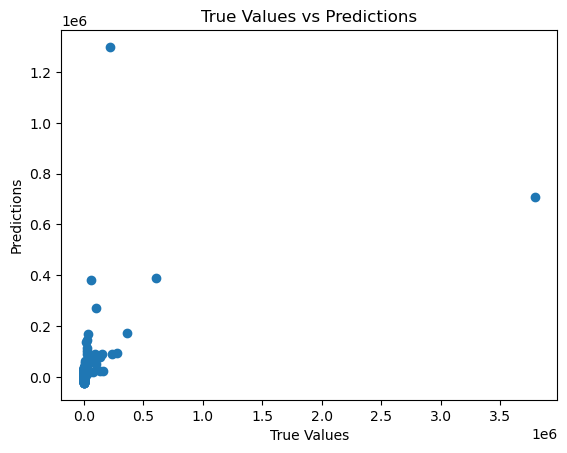

In [134]:
# Scatter plot of true vs predicted values
plt.scatter(y_test, y_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')
plt.show()

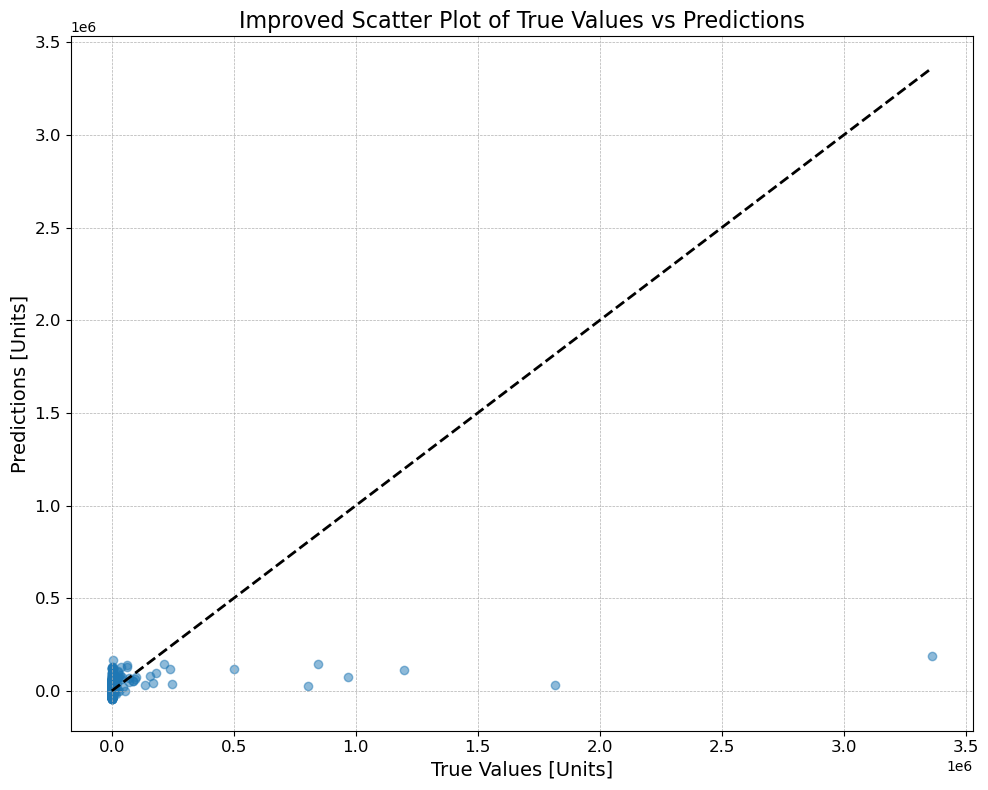

In [77]:
# Improved scatter plot
plt.figure(figsize=(10, 8))  # Larger figure size
plt.scatter(y_test, y_prediction, alpha=0.5)  # Semi-transparent points

# Adding a line of perfect prediction for reference
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)

plt.xlabel('True Values [Units]', fontsize=14)  # Descriptive label with font size
plt.ylabel('Predictions [Units]', fontsize=14)  # Descriptive label with font size
plt.title('Improved Scatter Plot of True Values vs Predictions', fontsize=16)  # Descriptive title with font size
plt.tick_params(axis='both', which='major', labelsize=12)  # Larger tick labels

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Tight layout often produces a nicer plot
plt.tight_layout()

# Show the plot
# plt.show()

In [72]:
with open('train.csv') as csv_file: # Make sure to replace 'train.csv' with your actual file path
    readCSV = csv.reader(csv_file)
    next(readCSV, None) # Skip the title of the csv file
    data1 = []
    for row in readCSV:
        data1.append(row)
# print(len(data1))

# with open('train.csv') as csv_file: #/Users/thanakornpongritsakda/Documents/Programming-SCMA-249/50_Startups.csv (path)
#     readCSV = csv.reader(csv_file)
#     next(readCSV, None) #skip the title of the csv file
#     data1 = []
#     for row in readCSV:
#         data1.append(row)
        
with open('train.csv') as csv_file: # Make sure to replace 'train.csv' with your actual file path
    readCSV = csv.reader(csv_file)
    next(readCSV, None) # Skip the title of the csv file
    data1 = []
    for row in readCSV:
        if "" not in row:  # This checks if 'NA' is not present in the row
            data1.append(row)

        
data1 = np.array(data1)
Artist_reputation = np.array(data1[:,2], dtype = np.float64)
Height = np.array(data1[:,3], dtype = np.float64)
Width = np.array(data1[:,4], dtype = np.float64)
Weight = np.array(data1[:,5], dtype = np.float64)
Material = np.array(data1[:,6])
Price_of_sculpture = np.array(data1[:,7], dtype = np.float64)
Base_shipping_price = np.array(data1[:,8], dtype = np.float64)
International = np.array(data1[:,9])
Express_shipment = np.array(data1[:,10])
Installation_included = np.array(data1[:,11])
Transport = np.array(data1[:,12])
Fragile = np.array(data1[:,13])
Customer_information = np.array(data1[:,14])
Remote_location = np.array(data1[:,15])
Scheduled_date = np.array(data1[:,16])
Delivery_date = np.array(data1[:,17])
Customer_location = np.array(data1[:,18])
Cost = np.abs(data1[:, 19].astype(np.float64))

Size = Width * Height


# Define a function to convert date strings to datetime objects
def parse_dates(date_str):
    return datetime.strptime(date_str, '%m/%d/%y')  # Adjusted the format to match your dates

# Vectorize the function so it can be applied over numpy arrays
vectorized_parse_dates = np.vectorize(parse_dates)

# Convert the date strings to datetime objects
Scheduled_dates_parsed = vectorized_parse_dates(Scheduled_date)
Delivery_dates_parsed = vectorized_parse_dates(Delivery_date)

# Calculate the difference in days
timeliness_of_a_shipping = (Delivery_dates_parsed - Scheduled_dates_parsed).astype('timedelta64[D]').astype(int)
# Early Shipping: Represented as a negative number
# On-time Shipping: Represented as zero
# Late Shipping: Represented as a positive number
# Clean data

# Create dummy for Material
Brass = np.zeros(len(Material))
Clay = np.zeros(len(Material))
Aluminium = np.zeros(len(Material))
Wood = np.zeros(len(Material))
Marble = np.zeros(len(Material))
Bronze = np.zeros(len(Material))
Stone = np.zeros(len(Material))

for i in range(len(Material)):
    if Material[i] == 'Brass':
        Brass[i] = 1
    elif Material[i] == 'Clay':
        Clay[i] = 1
    elif Material[i] == 'Aluminium':
        Aluminium[i] = 1
    elif Material[i] == 'Wood':
        Wood[i] = 1
    elif Material[i] == 'Marble':
        Marble[i] = 1
    elif Material[i] == 'Bronze':
        Bronze[i] = 1
    else:
        Stone[i] = 1

# print(Brass)
# print(Clay)
# print(Aluminium)
# print(Wood)
# print(Marble)
# print(Bronze)
# print(len(Stone))
# print(len(State))

# Clean data for International, Express Shipment, Installation Included, Fragile and Remote Location
International_clean = np.zeros(len(International))
for i in range(len(International)):
    if International[i] == 'Yes':
        International_clean[i] = 1

Express_shipment_clean = np.zeros(len(Express_shipment))
for i in range(len(Express_shipment)):
    if Express_shipment[i] == 'Yes':
        Express_shipment_clean[i] = 1
        
Installation_included_clean = np.zeros(len(Installation_included))
for i in range(len(Installation_included)):
    if Installation_included[i] == 'Yes':
        Installation_included_clean[i] = 1
        
Fragile_clean = np.zeros(len(Fragile))
for i in range(len(Fragile)):
    if Fragile[i] == 'Yes':
        Fragile_clean[i] = 1
        
Remote_location_clean = np.zeros(len(Remote_location))
for i in range(len(Remote_location)):
    if Remote_location[i] == 'Yes':
        Remote_location_clean[i] = 1
        
# print("International_clean:",International_clean)
# print("length of International_clean:",len(International_clean))

# print("Express_shipment_clean:",Express_shipment_clean)
# print("length of Express_shipment_clean:",len(Express_shipment_clean))

# print("Installation_included_clean:",Installation_included_clean)
# print("length of Installation_included_clean:",len(Installation_included_clean))

# print("Fragile_clean:",Fragile_clean)
# print("length of Fragile_clean:",len(Fragile_clean))

# print("Remote_location_clean",Remote_location_clean)
# print("length of Remote_location_clean:",len(Remote_location_clean))

# Clean data

# Create dummy for Transport
Airways = np.zeros(len(Transport))
Roadways = np.zeros(len(Transport))
Waterways = np.zeros(len(Transport))


for i in range(len(Transport)):
    if Transport[i] == 'Airways':
        Airways[i] = 1
    elif Transport[i] == 'Roadways':
        Roadways[i] = 1
    else:
        Waterways[i] = 1
        
# print("Airways:",Airways)
# print("Length of Airways:",len(Airways))

# print("Roadways:",Roadways)
# print("Length of Roadways:",len(Roadways))

# print("Waterways:",Waterways)
# print("Length of Waterways:",len(Waterways))

# Clean data

# Create dummy for Customer Information

# unique_CI = set(Customer_information)
# print(unique_CI)

Working_Class = np.zeros(len(Customer_information))
Wealthy = np.zeros(len(Customer_information))

for i in range(len(Customer_information)):
    if Customer_information[i] == 'Working Class':
        Working_Class[i] = 1
    else:
        Wealthy[i] = 1
print(Working_Class)
print(Wealthy)

x = np.stack((l,m,p), axis = 1) #axis = 1 connect horizontally (column by column)
y = Cost
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,random_state = 52)
#20 percent will be use for test #every one in this room will get equal result
# print(x)

# Run the linear regression model
LR = LinearRegression()
LR.fit(x_train, y_train)
print('b0 = ' + "{:.4f}".format(LR.intercept_))
for i in range(len(LR.coef_)):
    print('b' + str(i+1) + ' = ' + "{:.4f}".format(LR.coef_[i]))# "{:.4f}" -> use 4 decimal places
    
# Apply the model to the test set
y_prediction = LR.predict(x_test)
# print(y_prediction)
# print(y_test)

# Accuracy indicators
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)
MAPE = mean_absolute_percentage_error(y_test, y_prediction)
print('RMSE: ' + "{:.4f}".format(RMSE))
print('MAPE: ' + "{:.4f}".format(MAPE*100)+'%')

[1. 1. 1. ... 0. 1. 1.]
[0. 0. 0. ... 1. 0. 0.]
b0 = -1067.7061
b1 = 8.8143
b2 = 114.5555
b3 = 262.4320
RMSE: 129618.0047
MAPE: 463.9867%


In [133]:
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'a' through 'x1' are your independent variables and 'y' is the dependent variable
variables = [a, b, c, d, l, m, n, o, p, q, r, s, t, u, v, w, x1]
y = Cost  # Replace with your actual dependent variable data

# Splitting the dataset into training and testing sets
x_train_full, x_test_full, y_train, y_test = train_test_split(np.stack(variables, axis=1), y, test_size=0.2, random_state=38)

# To store the best combination and its error
best_combination = None
lowest_mape = float('inf')

# Iterate over all possible combinations of the independent variables
for i in range(1, len(variables) + 1):
    for combo in combinations(range(len(variables)), i):
        # Selecting the columns for the current combination
        x_train = x_train_full[:, combo]
        x_test = x_test_full[:, combo]

        # Train the linear regression model
        LR = LinearRegression()
        LR.fit(x_train, y_train)

        # Predict and calculate MAPE
        y_prediction = LR.predict(x_test)
        mape = mean_absolute_percentage_error(y_test, y_prediction)

        # Check if this combination gives a lower MAPE
        if mape < lowest_mape:
            lowest_mape = mape
            best_combination = combo

# Print the best combination and its MAPE
print("Best Combination:", best_combination)
print("Lowest MAPE:", lowest_mape)


Best Combination: (3, 4, 5, 6)
Lowest MAPE: 6.027674538160199


In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
file_path = 'train.csv'
data = pd.read_csv(file_path)

# Selecting features and target variable
X = data.drop(columns=['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'])
y = data['Cost']

# Handling categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers for numerical and categorical data
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating a modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LGBMRegressor())])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Model Root Mean Squared Error: {rmse}")


ModuleNotFoundError: No module named 'lightgbm'

Intercept (b0): 5.794199633868457
Coefficients (b1, b2, ...): [ 0.42781774  0.14807875  0.04731993  0.02360311  0.02910872  0.13374877
 -0.12809441  0.04964999  0.02099105 -0.08525424  0.17871625  0.17040549
 -0.20641413 -0.04595964  0.04595964 -0.0433087   0.0433087  -0.05831379
  0.05831379  0.01855859  0.02190974 -0.04046833 -0.04536782  0.04536782
  0.04568378 -0.04568378 -0.02383684  0.02383684]
Model Mean Absolute Percentage Error: 15.58435959128493%
R-squared value: 0.6327532278430799


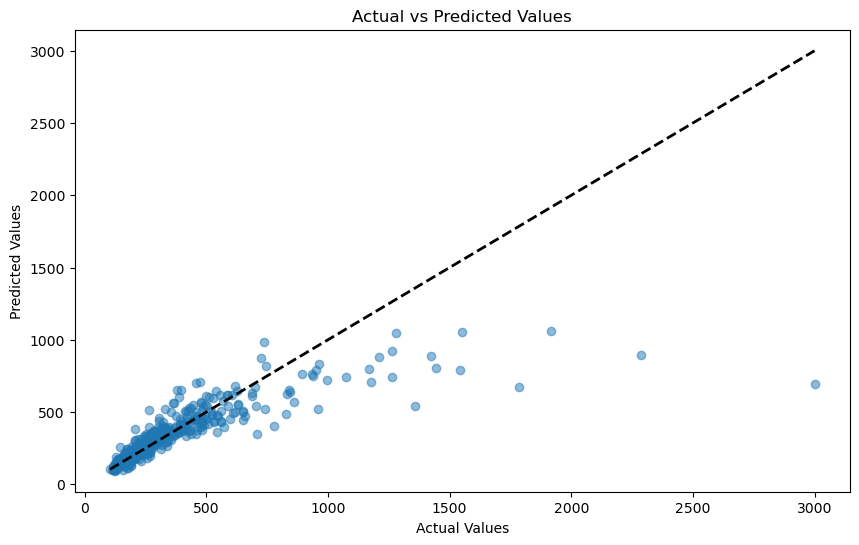

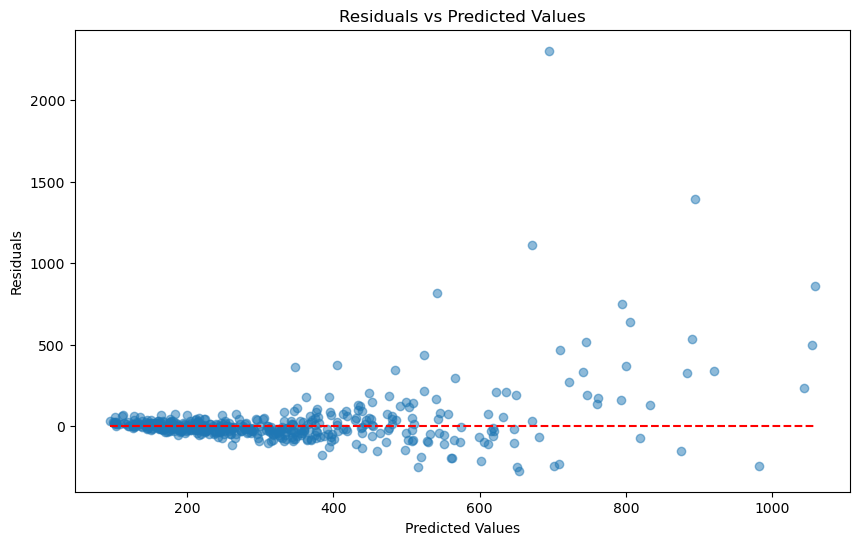

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Load the data
file_path = 'train.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Outlier Removal
exclude_columns = ['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location']
numeric_cols = data.select_dtypes(include=[np.number]).columns
features_to_check = [col for col in numeric_cols if col not in exclude_columns]

for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Ensuring all values in 'Cost' are non-negative for logarithmic transformation
data = data[data['Cost'] >= 0]

# Selecting features and target variable
X = data.drop(columns=['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'])
y = data['Cost']

# Apply a logarithmic transformation to the target variable
y_transformed = np.log1p(y)

# Handling categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Modeling pipeline with Ridge Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge(alpha=1.0))])  # Alpha is the regularization strength

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Extracting coefficients and intercept
coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_

# Printing coefficients and intercept
print("Intercept (b0):", intercept)
print("Coefficients (b1, b2, ...):", coefficients)

# Making predictions and evaluating the model
y_pred_transformed = model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)
y_test_original = np.expm1(y_test)

# Calculate MAPE using the original scale of the target
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
print(f"Model Mean Absolute Percentage Error: {mape}%")

# R-squared calculation
r2 = r2_score(y_test_original, y_pred)
print(f"R-squared value: {r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.show()

# Plotting Residuals
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.show()


Intercept (b0): -340356602335.7558
Coefficients (b1, b2, ...): [ 4.28085696e-01  1.47591591e-01  4.87858278e-02  2.22228349e-02
  2.95909745e-02  1.34041108e-01  2.45020284e+11  2.45020284e+11
  2.45020284e+11  2.45020284e+11  2.45020284e+11  2.45020284e+11
  2.45020284e+11  1.31893809e+12  1.31893809e+12 -6.30574525e+11
 -6.30574525e+11  6.80215360e+12  6.80215360e+12  2.47451137e+11
  2.47451137e+11  2.47451137e+11 -1.47161307e+11 -1.47161307e+11
 -7.51445047e+12 -7.51445047e+12  1.89797970e+10  1.89797970e+10]
Model Mean Absolute Percentage Error: 15.615127440138506%
R-squared value: 0.6311040684820488


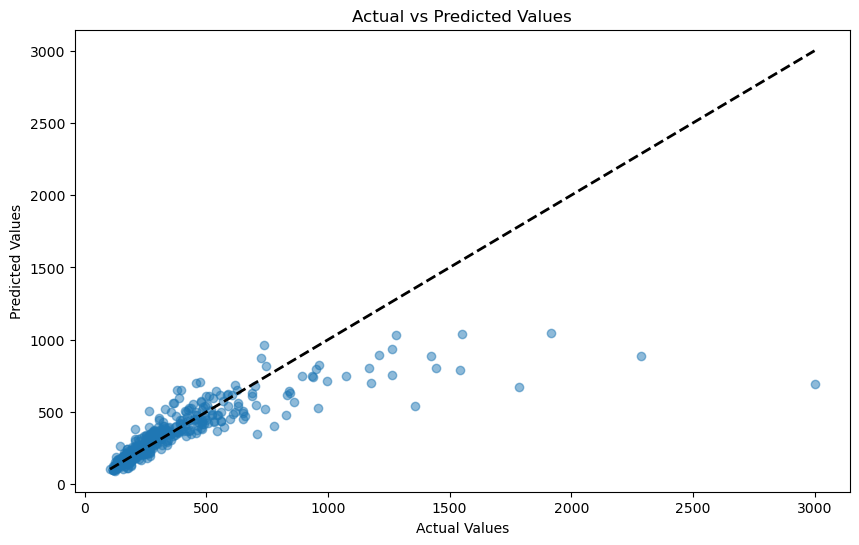

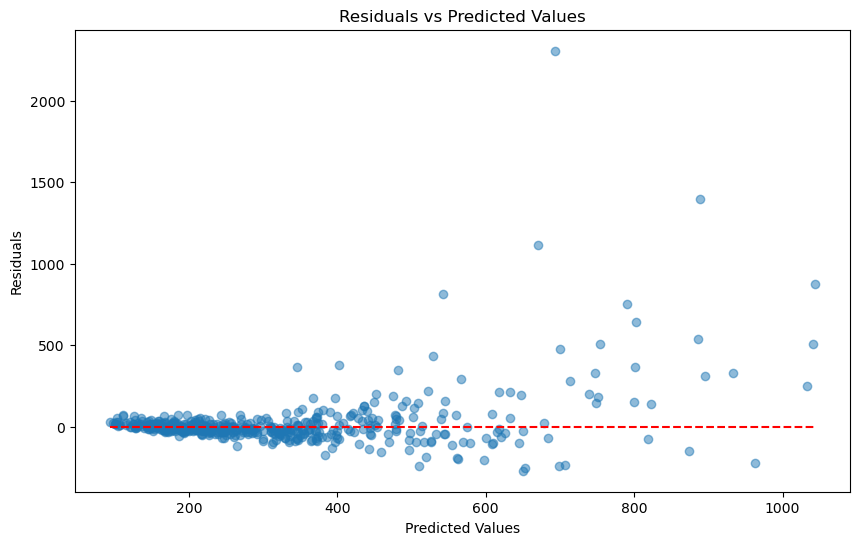

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Load the data
file_path = 'train.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Outlier Removal
exclude_columns = ['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location']
numeric_cols = data.select_dtypes(include=[np.number]).columns
features_to_check = [col for col in numeric_cols if col not in exclude_columns]

for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Ensuring all values in 'Cost' are non-negative for logarithmic transformation
data = data[data['Cost'] >= 0]

# Selecting features and target variable
X = data.drop(columns=['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'])
y = data['Cost']

# Apply a logarithmic transformation to the target variable
y_transformed = np.log1p(y)

# Handling categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Modeling pipeline with Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Extracting coefficients and intercept
coefficients = model.named_steps['regressor'].coef_
intercept = model.named_steps['regressor'].intercept_

# Printing coefficients and intercept
print("Intercept (b0):", intercept)
print("Coefficients (b1, b2, ...):", coefficients)

# Making predictions and evaluating the model
y_pred_transformed = model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)
y_test_original = np.expm1(y_test)

# Calculate MAPE using the original scale of the target
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
print(f"Model Mean Absolute Percentage Error: {mape}%")

# R-squared calculation
r2 = r2_score(y_test_original, y_pred)
print(f"R-squared value: {r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.show()

# Plotting Residuals
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.show()


Model Mean Absolute Percentage Error: 10.000378922018886%
R-squared value: 0.8803172169327269


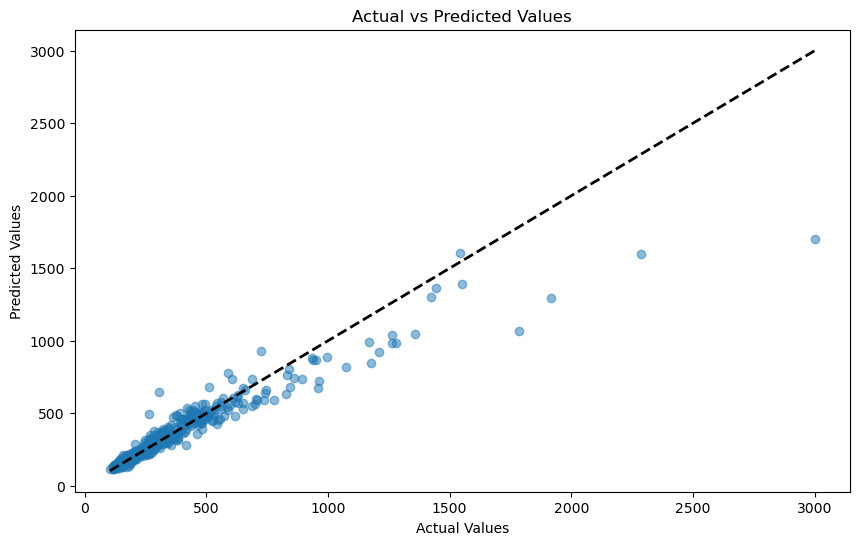

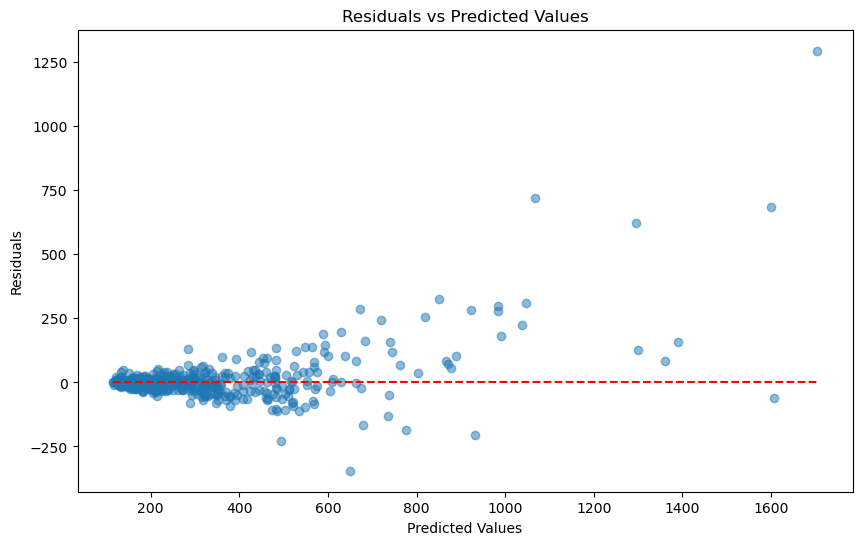

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Load the data
file_path = 'train.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Outlier Removal
exclude_columns = ['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location']
numeric_cols = data.select_dtypes(include=[np.number]).columns
features_to_check = [col for col in numeric_cols if col not in exclude_columns]

for feature in features_to_check:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Continue with your analysis as before...

# Ensuring all values in 'Cost' are non-negative for logarithmic transformation
data = data[data['Cost'] >= 0]

# Selecting features and target variable
X = data.drop(columns=['Cost', 'Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'])
y = data['Cost']

# Apply a logarithmic transformation to the target variable
y_transformed = np.log1p(y)

# Handling categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Creating transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())  # Standardizing numerical features
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundling transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Modeling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0))])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=0)

# Training the model
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred_transformed = model.predict(X_test)
y_pred = np.expm1(y_pred_transformed)
y_test_original = np.expm1(y_test)

# Calculate MAPE using the original scale of the target
mape = mean_absolute_percentage_error(y_test_original, y_pred) * 100
print(f"Model Mean Absolute Percentage Error: {mape}%")

# R-squared calculation
r2 = r2_score(y_test_original, y_pred)
print(f"R-squared value: {r2}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'k--', lw=2)
plt.show()

# Plotting Residuals
residuals = y_test_original - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
plt.show()

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_percentage_error, r2_score

# Load the training data
train_file_path = 'train.csv'  # Replace with your file path for training data
data = pd.read_csv(train_file_path)

# Outlier Removal and Data Preprocessing for Training Data...
# [Include the same preprocessing steps as before for the training data]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=2)

# Modeling pipeline with Linear Regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Training the model
model.fit(X_train, y_train)

# Load the test data
test_file_path = 'train.csv'  # Replace with your file path for test data
test_data = pd.read_csv(test_file_path)

# Data Preprocessing for Test Data
# [Apply similar preprocessing steps as training data, but DO NOT remove outliers or transform target variable]

# Ensure that test data has the same feature columns as X used for training
test_X = test_data[X.columns]

# Making predictions on the test data
test_y_pred_transformed = model.predict(test_X)

# Optional: Inspect the predicted values
print("Max log-scale prediction:", max(test_y_pred_transformed))

# Clipping predictions to a maximum value if needed
# Replace MAX_LOG_SCALE_PREDICTION with a value based on your domain knowledge
MAX_LOG_SCALE_PREDICTION = 10  # Example value, adjust based on your data
test_y_pred_transformed_clipped = np.clip(test_y_pred_transformed, None, MAX_LOG_SCALE_PREDICTION)

# Apply expm1 transformation with clipped values
test_y_pred = np.expm1(test_y_pred_transformed_clipped)

# Creating a DataFrame for the predictions
predictions = pd.DataFrame({'Artist Name': test_data['Artist Name'], 'Predicted Cost': test_y_pred})

# Optionally, save the predictions to a new CSV file
predictions.to_csv('predictions.csv', index=False)

# Displaying first few predictions
print(predictions.head(23))


Max log-scale prediction: 3327.86328125
          Artist Name  Predicted Cost
0       Billy Jenkins      229.991939
1         Jean Bryant      141.866991
2        Laura Miller      131.518035
3      Robert Chaires      127.943587
4        Rosalyn Krol      147.268295
5       Tracy Francis      978.183195
6         David Hawes     3107.800338
7         David Osher      469.276262
8         Arnold Reel      109.831143
9       James Comfort    10619.143559
10        Greg Mendez     3535.519879
11    Stacey Carlozzi    22025.465795
12    Beverly Credeur      202.849670
13        James Davis      333.127761
14  Patricia Crosslin      480.428542
15         Raul White    22025.465795
16     Esther Simmons      329.557707
17            Pete Oh    22025.465795
18       Ralph Mangum     1224.774447
19   Jennifer Johnson    12784.342640
20      Kathryn Dodge      327.305741
21        Laura Price    14027.245685
22         John Blair      218.769248
